# V.A Categorica

- Cada una de las N posibles salidas tiene un valor de probabilidad específico
- La forma mas usual de definirla es a través de un histograma
- Este tipo de representación se llama no paramétrica debido a que la V.A no queda definida con unos pocos parámetros sino que hay que definirla explicitamente

# Ejemplos

In [3]:
import numpy as np

In [11]:
X = {1: 0.1, 2: 0.3, 3: 0.5, 4:0.1}

In [12]:
# Obviamente la suma tiene que ser 1
sum(X.values())

1.0

In [13]:
from matplotlib import pyplot as plt

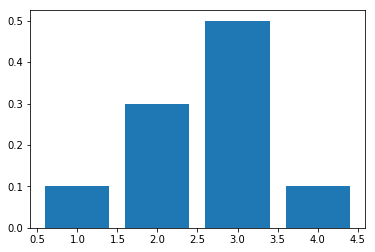

In [16]:
plt.bar(X.keys(), X.values())
plt.show()

## Calcular la entropía de una V.A categórica

In [32]:
def mean(X):
    m = 0
    for x, p in X.items():
        m = m + x*p
    return m

In [34]:
mean(X)

2.6

In [35]:
def variance(X):
    m = mean(X)
    v = 0
    for x, p in X.items():
        v = v + (x-m)**2*p
    return v

In [36]:
variance(X)

0.64

In [27]:
def entropy(X, normalize = True):
    e = 0
    for x, p in X.items():
        e = e - np.log(p)* p
    if normalize:
        e = e/np.log(len(X))
    return e

In [30]:
entropy(X, normalize=True)

0.8427376486136672

## Que idea intuitiva nos da la varianza o el desvio estandard? y la entropía?

In [79]:
def analize_VA(X):
    #assert sum(X.values()) == 1
    plt.bar(X.keys(), X.values())
    plt.show()
    print('Media:', mean(X))
    print('Entropía normalizada:', entropy(X, normalize=True))
    print('Varianza:', variance(X))

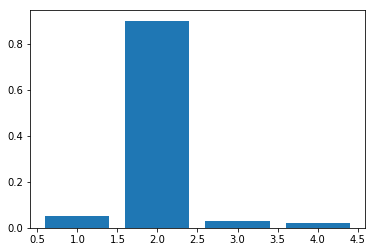

Media: 2.02
Entropía normalizada: 0.3087715616560074
Varianza: 0.15960000000000002


In [80]:
X_1 = {1: 0.05, 2: 0.9, 3: 0.03, 4:0.02}
analize_VA(X_1)

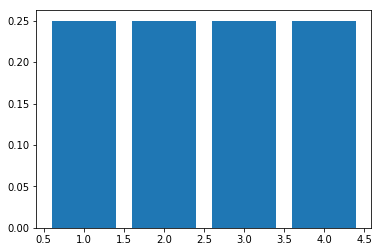

Media: 2.5
Entropía normalizada: 1.0
Varianza: 1.25


In [81]:
X_2 = {1: 0.25, 2: 0.25, 3: 0.25, 4:0.25}
analize_VA(X_2)

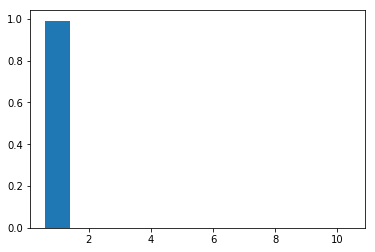

Media: 1.0449999999999997
Entropía normalizada: 0.030891008405092145
Varianza: 0.282975


In [82]:
X_3 = {1: 0.991, 2: 0.001, 3: 0.001, 4:0.001, 5:0.001, 6:0.001, 7:0.001, 8:0.001, 9:0.001, 10:0.001}
analize_VA(X_3)

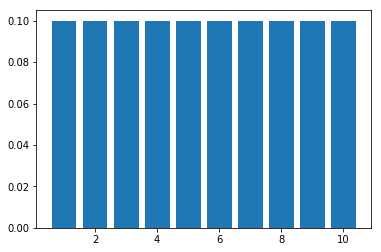

Media: 5.500000000000001
Entropía normalizada: 0.9999999999999998
Varianza: 8.25


In [83]:
X_4 = {1: 0.1, 2: 0.1, 3: 0.1, 4:0.1, 5:0.1, 6:0.1, 7:0.1, 8:0.1, 9:0.1, 10:0.1}
analize_VA(X_4)

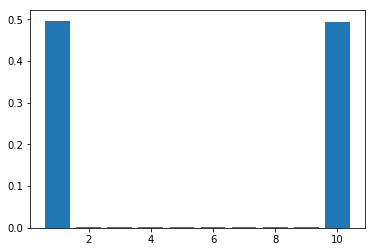

Media: 5.4910000000000005
Entropía normalizada: 0.32608130132741736
Varianza: 20.129919


In [105]:
X_5 = {1: 0.497, 2: 0.001, 3: 0.001, 4:0.001, 5:0.001, 6:0.001, 7:0.001, 8:0.001, 9:0.001, 10:0.495}
analize_VA(X_5)

# Modelo generador de una V.A Categórica

In [115]:
X = {1: 0.1, 2: 0.3, 3: 0.5, 4:0.1}

In [123]:
observaciones = np.random.choice(list(X.keys()), size = 1000, p = list(X.values()))

In [127]:
observaciones[:100]

array([4, 2, 2, 3, 2, 3, 3, 2, 2, 3, 3, 2, 2, 3, 3, 2, 3, 2, 2, 3, 3, 3,
       3, 3, 3, 4, 2, 3, 3, 2, 1, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 2, 3, 3,
       3, 3, 3, 3, 3, 4, 2, 1, 3, 1, 3, 3, 3, 4, 3, 2, 1, 3, 4, 1, 3, 2,
       3, 2, 3, 3, 3, 3, 1, 2, 2, 2, 3, 3, 1, 2, 2, 2, 4, 3, 3, 1, 3, 2,
       3, 1, 2, 2, 3, 3, 4, 1, 3, 3, 3, 3])

# Estimar la función de masa de probabilidad de las observaciones

In [128]:
from collections import Counter
Counter(observaciones)

Counter({4: 98, 2: 284, 3: 521, 1: 97})

Histograma

In [134]:
np.histogram(observaciones, bins=4, range=[1,5])

(array([ 97, 284, 521,  98]), array([1., 2., 3., 4., 5.]))

Tener en cuenta que toma como primer intervalo [1, 2), como segundo [2,3), y asi hasta el ultimo [4, 5)

donde "[" es incluido y ")" es excluido

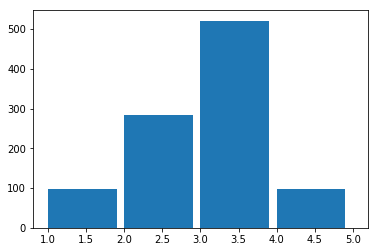

In [139]:
hist = plt.hist(observaciones, bins=4, range=[1,5], width=0.9)

In [138]:
hist

(array([ 97., 284., 521.,  98.]),
 array([1., 2., 3., 4., 5.]),
 <a list of 4 Patch objects>)

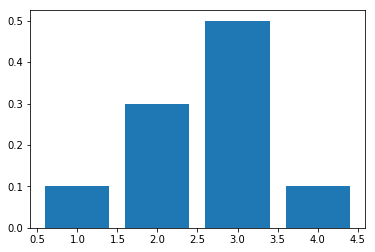

Media: 2.6
Entropía normalizada: 0.8427376486136672
Varianza: 0.64


In [141]:
# Esta es la Ground Truth
analize_VA(X)